#### Kutay İlmen Aytekin - 2017402105

#### IE 360 Statistical Forecasting and Time Series  Homework 2



* In the homework 2, there is a dataset “IE360_Spring22_HW2_data.csv”. The dataset has diesel sales (in 1000 m3) of a major distributor between 2000 and 2006. 

* I tried to find a good model to forecast the sales of UGS for every quarter of 2007.

In [1]:
data = read.csv("IE360_Spring22_HW2_data.csv") # read data

In [2]:
library(data.table)
setDT(data) # read.csv() function makes the data type dataframe so I make the data datatable as well.

Warning message:
"package 'data.table' was built under R version 3.6.3"

In [3]:
colnames(data) <- c('Quarter','GasolineSale','RNUV', 'Num_LPGVehicles', 'Price_Gas', 'Price_diesel', 'Num_GasolineVehicles', 'Num_DieselVehicles', 'GNPAg', 'GNPCo', 'GNPTOTAL')

In [4]:
head(data)

Quarter,GasolineSale,RNUV,Num_LPGVehicles,Price_Gas,Price_diesel,Num_GasolineVehicles,Num_DieselVehicles,GNPAg,GNPCo,GNPTOTAL
2000_Q1,1 128 971,0.0146,940 000,469.03,355.69,4 647 500,281.9853,1 040 173,3 483 132,18 022 686
2000_Q2,1 199 569,0.0205,941 000,459.42,344.58,4 742 876,284.0813,1 760 460,4 525 451,21 797 130
2000_Q3,1 370 167,0.0207,943 500,439.98,327.21,4 840 931,286.7169,6 974 808,5 915 204,30 050 207
2000_Q4,1 127 548,0.0163,948 000,402.08,300.67,4 919 685,288.3137,3 267 125,4 929 778,24 480 153
2001_Q1,1 033 918,0.0071,950 000,411.58,305.75,4 954 754,287.6237,1 004 528,3 418 387,15 832 648
2001_Q2,1 019 754,0.0051,955 000,520.39,374.78,4 980 204,287.8814,1 449 357,4 359 831,20 296 918


In [5]:
data$Quarter = gsub("_Q", "-Q", data$Quarter) # prepare the data

In [6]:
data$GasolineSale = gsub(" ", "", data$GasolineSale)
data$Num_LPGVehicles = gsub(" ", "", data$Num_LPGVehicles)
data$Num_GasolineVehicles = gsub(" ", "", data$Num_GasolineVehicles)
data$GNPAg= gsub(" ", "", data$GNPAg)
data$GNPCo = gsub(" ", "", data$GNPCo)
data$GNPTOTAL = gsub(" ", "", data$GNPTOTAL)

In [7]:
data$GasolineSale = as.numeric(data$GasolineSale)
data$Num_LPGVehicles= as.numeric(data$Num_LPGVehicles)
data$Num_GasolineVehicles = as.numeric(data$Num_GasolineVehicles)
data$GNPAg = as.numeric(data$GNPAg)
data$GNPCo = as.numeric(data$GNPCo)
data$GNPTOTAL = as.numeric(data$GNPTOTAL) # make numeric 

In [8]:
library(lubridate)
library(zoo)

Warning message:
"package 'lubridate' was built under R version 3.6.3"
Attaching package: 'lubridate'

The following objects are masked from 'package:data.table':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year

The following objects are masked from 'package:base':

    date, intersect, setdiff, union

Warning message:
"package 'zoo' was built under R version 3.6.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



In [9]:
data$Quarter = as.Date(as.yearqtr(data$Quarter, format = "%Y-Q%q")) # Quarters to date for time series plot

In [10]:
library(ggplot2)

#### Plot of the time series 

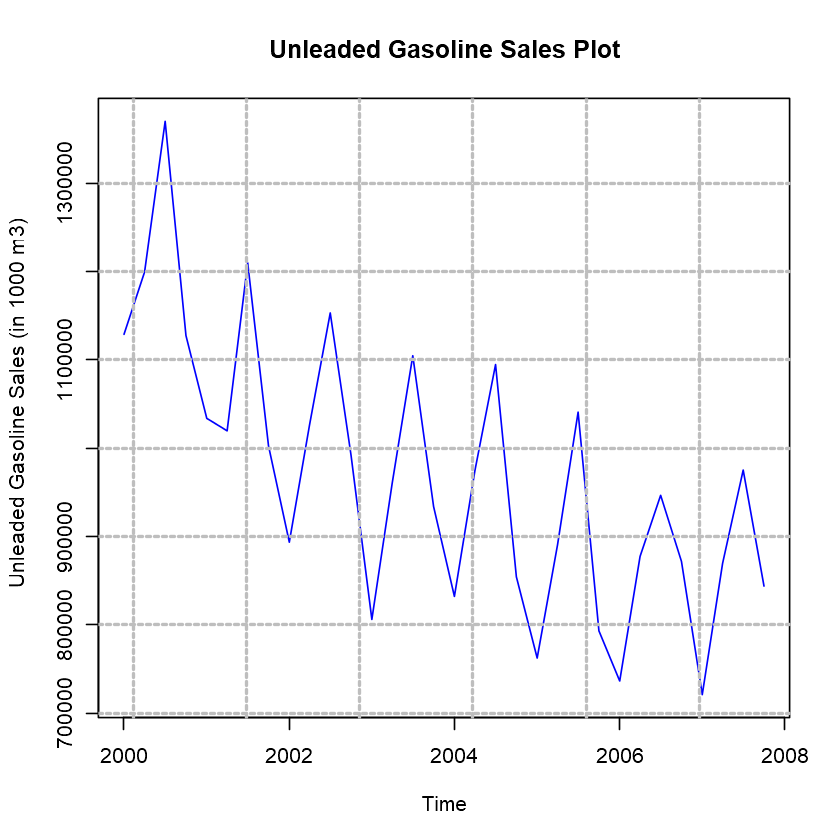

In [26]:
plot(data$Quarter, data$GasolineSale,
main="Unleaded Gasoline Sales Plot",
ylab="Unleaded Gasoline Sales (in 1000 m3)",
xlab="Time",
type='l',
col="blue")

grid(nx = NULL, ny = NULL,
     lty = 2,      
     col = "gray", 
     lwd = 2)      

* The trend of the time series is a decreasing trend over time. This means that the time series is not stationary with respect to the mean. 

* There is also seasonality but the variance does not change too much. Therefore, the time series is stationary with respect to the variance. (see the examples of variance-related non-stationary time series)

In [12]:
library(xts)
library(tsbox)

Warning message:
"package 'xts' was built under R version 3.6.3"
Attaching package: 'xts'

The following objects are masked from 'package:data.table':

    first, last



In [13]:
data2 = head(data, 28)
ts_data <- xts(data2$GasolineSale, data2$Quarter) 
data_ts <- ts_ts(ts_data) 
class(data_ts) # data time series object

[1] "ts"

In [14]:
library(fpp)

Warning message:
"package 'fpp' was built under R version 3.6.3"Loading required package: forecast
Warning message:
"package 'forecast' was built under R version 3.6.3"Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Loading required package: fma
Warning message:
"package 'fma' was built under R version 3.6.3"Loading required package: expsmooth
Warning message:
"package 'expsmooth' was built under R version 3.6.3"Loading required package: lmtest
Warning message:
"package 'lmtest' was built under R version 3.6.3"Loading required package: tseries
Warning message:
"package 'tseries' was built under R version 3.6.3"

#### Autocorrelation

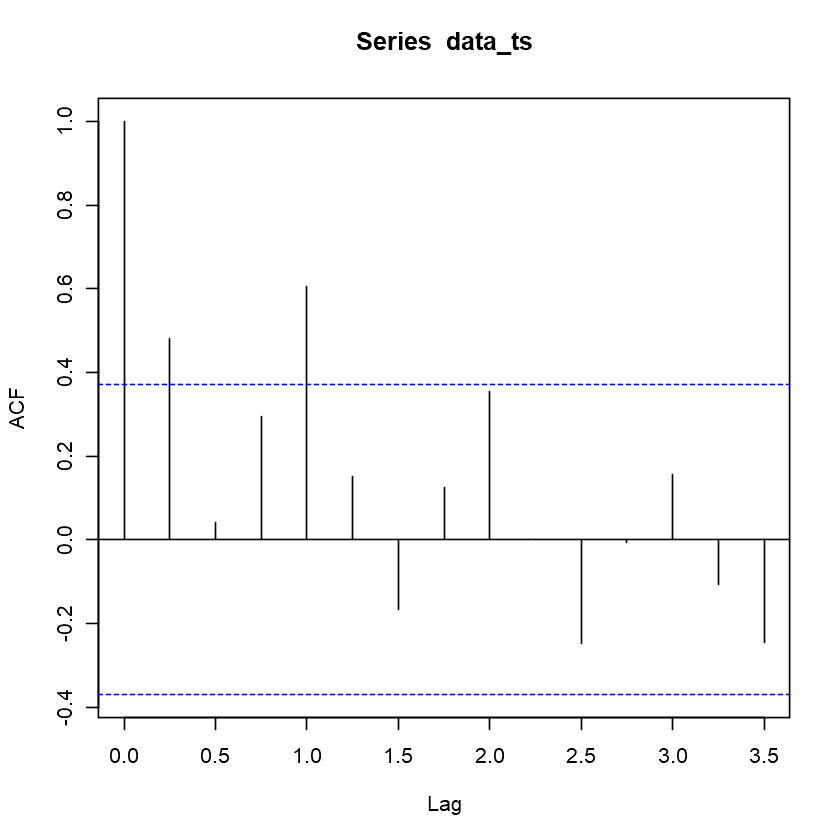

In [15]:
acf(data_ts) # Autocorrelation plot

* There is autocorrelation at lag 4. This means that the season one year before affects this season in the time series. Because the data is set quarterly, this is expected. (See monthly data and lag 12 autocorrelation and this is similar)  

* Also, there is autocorrelation at lag 1. This means that one season ahead is affected by this season. [(t) affects (t+1)]    

#### New Variables for the model selection

In [16]:
data[, trend:=1:.N] # add trend for time series 
season=seq(1,4,by=1)
data=cbind(data,season) # add season for time series
data$season = as.factor(data$season) # make season factor
levels(data$season) <- c("Q1", "Q2", "Q3", "Q4") # Change levels name for clarity

In [17]:
data[, lag4 := 1:.N] # add lagged variable (in Moodle lag 4 is recommended)
for (i in (1:28)) {
    data$lag4[i+4] = data[,data$GasolineSale[i]] 
}
head(data)
tail(data) # Check if there is a problem and the first 4 lag 4 neeeded to be NA

Quarter,GasolineSale,RNUV,Num_LPGVehicles,Price_Gas,Price_diesel,Num_GasolineVehicles,Num_DieselVehicles,GNPAg,GNPCo,GNPTOTAL,trend,season,lag4
2000-01-01,1128971,0.0146,940000,469.03,355.69,4647500,281.9853,1040173,3483132,18022686,1,Q1,1
2000-04-01,1199569,0.0205,941000,459.42,344.58,4742876,284.0813,1760460,4525451,21797130,2,Q2,2
2000-07-01,1370167,0.0207,943500,439.98,327.21,4840931,286.7169,6974808,5915204,30050207,3,Q3,3
2000-10-01,1127548,0.0163,948000,402.08,300.67,4919685,288.3137,3267125,4929778,24480153,4,Q4,4
2001-01-01,1033918,0.0071,950000,411.58,305.75,4954754,287.6237,1004528,3418387,15832648,5,Q1,1128971
2001-04-01,1019754,0.0051,955000,520.39,374.78,4980204,287.8814,1449357,4359831,20296918,6,Q2,1199569


Quarter,GasolineSale,RNUV,Num_LPGVehicles,Price_Gas,Price_diesel,Num_GasolineVehicles,Num_DieselVehicles,GNPAg,GNPCo,GNPTOTAL,trend,season,lag4
2006-07-01,946783,0.0108,1653250,565.19,449.19,5754077,333.7144,6800688,7124204,34992138,27,Q3,1040946
2006-10-01,872000,0.0133,1696000,565.19,449.19,5825866,339.2281,2303373,6093090,29867726,28,Q4,793399
2007-01-01,NA,0.0074,1715000,565.19,449.19,5869018,342.1729,1132973,4857305,24413807,29,Q1,736580
2007-04-01,NA,0.0106,1725300,565.19,449.19,5931348,346.9407,1570703,5852404,27597857,30,Q2,877614
2007-07-01,NA,0.0101,1751050,565.19,449.19,5991280,351.4449,7140722,7480414,36741745,31,Q3,946783
2007-10-01,NA,0.0124,1797400,565.19,449.19,6065597,357.2902,2418541,6397745,31361112,32,Q4,872000


In [18]:
data$lag4[1:4] <- NA # make first four rows NA for lag4
head(data)

Quarter,GasolineSale,RNUV,Num_LPGVehicles,Price_Gas,Price_diesel,Num_GasolineVehicles,Num_DieselVehicles,GNPAg,GNPCo,GNPTOTAL,trend,season,lag4
2000-01-01,1128971,0.0146,940000,469.03,355.69,4647500,281.9853,1040173,3483132,18022686,1,Q1,NA
2000-04-01,1199569,0.0205,941000,459.42,344.58,4742876,284.0813,1760460,4525451,21797130,2,Q2,NA
2000-07-01,1370167,0.0207,943500,439.98,327.21,4840931,286.7169,6974808,5915204,30050207,3,Q3,NA
2000-10-01,1127548,0.0163,948000,402.08,300.67,4919685,288.3137,3267125,4929778,24480153,4,Q4,NA
2001-01-01,1033918,0.0071,950000,411.58,305.75,4954754,287.6237,1004528,3418387,15832648,5,Q1,1128971
2001-04-01,1019754,0.0051,955000,520.39,374.78,4980204,287.8814,1449357,4359831,20296918,6,Q2,1199569


#### Model Selection 


I try several models. In the logical thinking, it would be logical to check the models with the trend, seasonal, lagged variables, price of the gasoline variable and number of vehicles using gasoline variable. Therefore, I checked one by one these models and I decided to continue one of the models as final model.

In [19]:
lm_tr = lm(GasolineSale~trend,data) # only trend
lm_trse = lm(GasolineSale~trend+season, data) # trend + seasonal
lm_trselag = lm(GasolineSale~trend+season+lag4, data) # trend + seasonal + lag4
lm_trselagprice = lm(GasolineSale~trend+season+lag4+Price_Gas, data) # trend + seasonal + lag4 + price variable
lm_trseprice = lm(GasolineSale~trend+season+Price_Gas, data) # trend + seasonal + price variable
lm_selagprice = lm(GasolineSale~season+Price_Gas+lag4, data) # seasonal + lag4 + price variable
lm_trsepricenum = lm(GasolineSale~trend+season+Price_Gas+Num_GasolineVehicles, data) # trend + season + price + number of vehicles
lm_trsenum = lm(GasolineSale~trend+season+Num_GasolineVehicles, data) # trend + season + number of vehicles

In [20]:
#summary(lm_tr)
#summary(lm_trse)
#summary(lm_trselag)
#summary(lm_trselagprice)
#summary(lm_trseprice)
#summary(lm_selagprice)
#summary(lm_trsepricenum)
#summary(lm_trsenum)

* When we look at different models and their summaries, I decided to continue with the model with the variables, seasonal, price of the gasoline and lag4(lm_selagprice). This is why I selected this model:

#### Explanation of the model selection using residuals analysis and significance of the variables


Call:
lm(formula = GasolineSale ~ season + Price_Gas + lag4, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-72357 -21109   1485  18829  64542 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.682e+05  1.541e+05   4.984 9.60e-05 ***
seasonQ2     8.316e+04  2.396e+04   3.471 0.002729 ** 
seasonQ3     1.566e+05  3.298e+04   4.748 0.000161 ***
seasonQ4     5.992e+04  2.202e+04   2.721 0.014002 *  
Price_Gas   -6.889e+02  1.979e+02  -3.481 0.002670 ** 
lag4         4.647e-01  8.078e-02   5.753 1.88e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 36280 on 18 degrees of freedom
  (8 observations deleted due to missingness)
Multiple R-squared:  0.9328,	Adjusted R-squared:  0.9141 
F-statistic: 49.93 on 5 and 18 DF,  p-value: 6.319e-10



	Breusch-Godfrey test for serial correlation of order up to 9

data:  Residuals
LM test = 11.605, df = 9, p-value = 0.2365


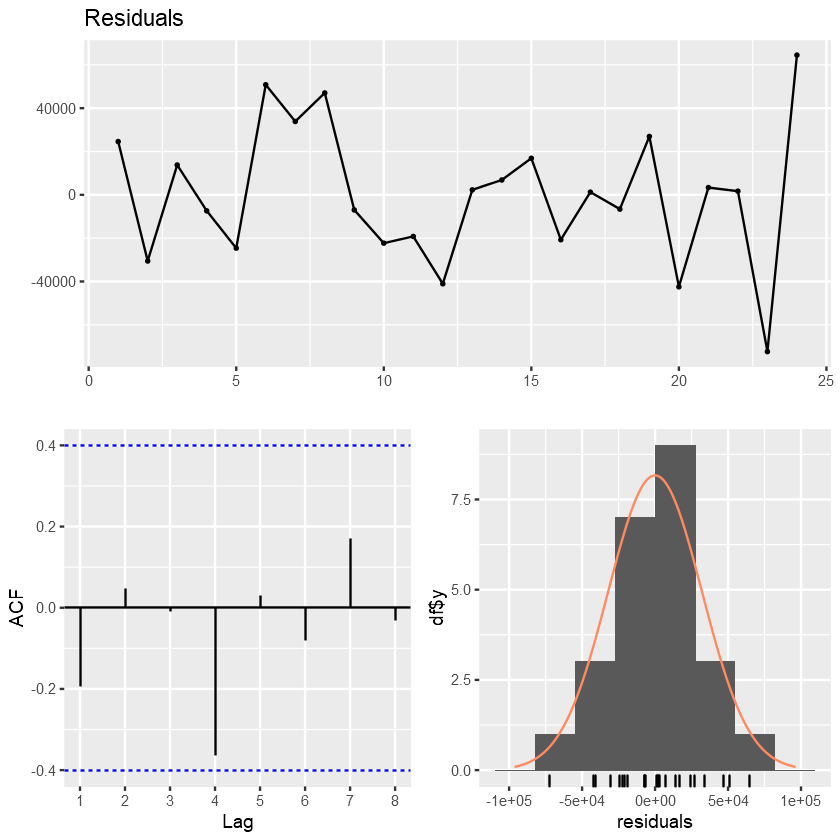

In [21]:
summary(lm_selagprice)
checkresiduals(lm_selagprice)

* Among our assumptions, there is not any problem. Visually, the residuals seems normally distributed, there is no autocorrelation between residuals and mean zero is achieved. 

* The first reason I use this model is that it is meaningful to use seasonal variables, and it is understandable that price of the gasoline affects the sales. lag4 works better than the trend variable when I compared these two variables in the same model setting. Therefore, I take these variables in my model.

* Also, all the variables I used is significant in the model.

* The model I will use is also better than the models with the number of vehicles using Gasoline in terms of R-squared and residual errors.

* R-squared values is quite well for a model to be selected. Therefore, the variables have a meaning and the model fit is well.

#### Forecast

In [37]:
library(forecast)
lm_final = lm_selagprice
predicted = predict(lm_final, data[29:32,]) 
#prediction_of_all = predict(lm_final, data) just for checking

In [36]:
paste("2007-Q1:", predicted[1])
paste("2007-Q2:", predicted[2])
paste("2007-Q3:", predicted[3])
paste("2007-Q4:", predicted[4])      

[1] "2007-Q1: 721129.535516759"

[1] "2007-Q2: 869823.843294303"

[1] "2007-Q3: 975382.404232606"

[1] "2007-Q4: 843984.052880024"

In [24]:
data$GasolineSale[29:32] = predicted

Plot with the prediction:

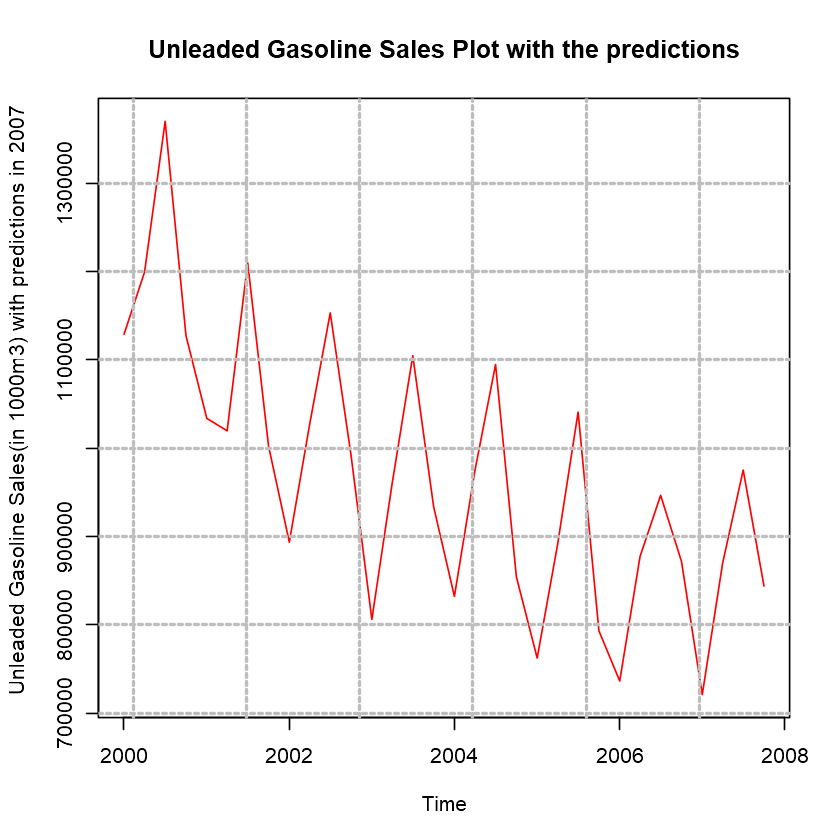

In [34]:
plot(data$Quarter, data$GasolineSale,
main="Unleaded Gasoline Sales Plot with the predictions",
ylab="Unleaded Gasoline Sales(in 1000m3) with predictions in 2007",
xlab="Time",
type='l',
col="red")

grid(nx = NULL, ny = NULL,
     lty = 2,      
     col = "gray", 
     lwd = 2)        

* Finally, it seems that the model I selected gives us an interesting result. This is because I do not use the trend variable in my model. However, statistically speaking, the model fits very well. Still, with different regressors, we can build up a better model. However, still, this model is good to use. 

* When we plot the predictions with the actual data, the model seems not bad. 